<a href="https://colab.research.google.com/github/PercyJ00/Simulating-Beta-Delaunay-tesselations-/blob/main/Simulations_Dela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for simulations


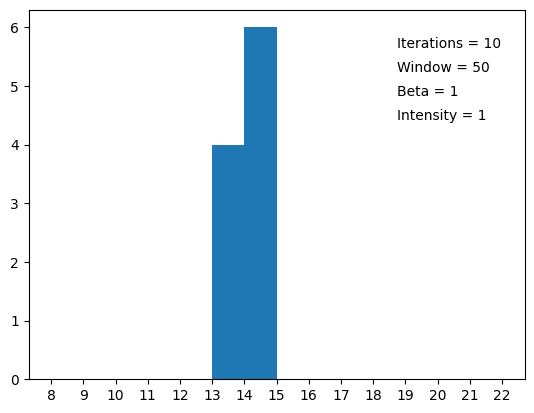

[[13. 14. 14. 14. 14. 14. 14. 13. 13. 13.]]
Maximal vertex 8 appears: 0.0 times
Maximal vertex 9 appears: 0.0 times
Maximal vertex 10 appears: 0.0 times
Maximal vertex 11 appears: 0.0 times
Maximal vertex 12 appears: 0.0 times
Maximal vertex 13 appears: 4.0 times
Maximal vertex 14 appears: 6.0 times
Maximal vertex 15 appears: 0.0 times
Maximal vertex 16 appears: 0.0 times
Maximal vertex 17 appears: 0.0 times
Maximal vertex 18 appears: 0.0 times
Maximal vertex 19 appears: 0.0 times
Maximal vertex 20 appears: 0.0 times
Maximal vertex 21 appears: 0.0 times
Maximal vertex 22 appears: 0.0 times


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math


def Area_of_Triangle(x_1, y_1, x_2, y_2, x_3, y_3):
  area = abs((x_1 * (y_2 - y_3) + x_2 * (y_3 - y_1) + x_3 * (y_1 - y_2))/2)
  return area

def Paraboloid_3_points(x_1, y_1, z_1, x_2, y_2, z_2, x_3, y_3, z_3):
  x_coord = (z_2 - z_1 - x_1**2 + x_2**2 - y_1**2 + y_2**2 + (y_1 - y_2) * (z_3 - z_2 - x_2**2 + x_3**2 - y_2**2 + y_3**2) / (y_3 - y_2))
  x_coord = x_coord / ((2 * (x_2 - x_1)) * (1 - ((x_2 - x_3) * (y_1 - y_2)) / ((x_2 - x_1) * (y_3 - y_2))))
  y_coord = (z_3 - z_2 - x_2**2 + x_3**2 - y_2**2 + y_3**2 + 2 * x_coord * (x_2 - x_3)) / (2 * (y_3 - y_2))
  height = z_2 + (x_2 - x_coord)**2 + (y_2 - y_coord)**2

  return x_coord, y_coord, height



def Creating_triangle_table(point_1, point_2, point_3, Points, length_x, length_y):

  window_rate = 0.08
  area = Area_of_Triangle(Points[int(point_1)][0], Points[int(point_1)][1], Points[int(point_2)][0], Points[int(point_2)][1], Points[int(point_3)][0], Points[int(point_3)][1])
  p_x, p_y, p_z = Paraboloid_3_points(Points[int(point_1)][0], Points[int(point_1)][1], Points[int(point_1)][2], Points[int(point_2)][0], Points[int(point_2)][1],
                                      Points[int(point_2)][2], Points[int(point_3)][0], Points[int(point_3)][1], Points[int(point_3)][2])

  ##### Checker #####
  if_inside = 0

  if ( ( - length_x/2 + length_x * window_rate) < Points[int(point_1)][0] < ( length_x/2 - length_x * window_rate) and ( - length_y/2 + length_y * window_rate) < Points[int(point_1)][1] < ( length_y/2 - length_y * window_rate) ) or \
     ( ( - length_x/2 + length_x * window_rate) < Points[int(point_2)][0] < ( length_x/2 - length_x * window_rate) and ( - length_y/2 + length_y * window_rate) < Points[int(point_2)][1] < ( length_y/2 - length_y * window_rate) ) or \
     ( ( - length_x/2 + length_x * window_rate) < Points[int(point_3)][0] < ( length_x/2 - length_x * window_rate) and ( - length_y/2 + length_y * window_rate) < Points[int(point_3)][1] < ( length_y/2 - length_y * window_rate) ):

    if_inside = -4

  else:

    if_inside = -5

  ##### Checker #####

  table = np.array([point_1, point_2, point_3, area, p_x, p_y, p_z, 0, 0, 0, -4, if_inside])
  return table



def Paraboloid_check(current_triangle, Triangles, table_of_triangles, new_point):

  #print('entered')

  #print(current_triangle, table_of_triangles)

  if current_triangle == -1:
    return table_of_triangles

  elif current_triangle in table_of_triangles: #make a loop to chec
    return table_of_triangles


  else:
    height_midpoint = -(new_point[0] - Triangles[int(current_triangle)][4])**2 - (new_point[1] - Triangles[int(current_triangle)][5])**2 + Triangles[int(current_triangle)][6]
    if height_midpoint > new_point[2]: ##point is inside of the parabola

      #print(height_midpoint, new_point[2], current_triangle, table_of_triangles, '\n')
      table_of_triangles = np.vstack((table_of_triangles, current_triangle))


      for i in range(3): #Update the table of triangles, cast the function again (recurrence)
          #print('\n', 'now', table_of_triangles)
          table_of_triangles = Paraboloid_check(Triangles[int(current_triangle)][7+i], Triangles, table_of_triangles, new_point)

      return table_of_triangles


    else:
      return table_of_triangles #Why is it needed?


def Outside_edges(edges):   ##Fixed?

  iter = 1
  length = edges.shape[0]
  outside_edges = np.zeros((1,4))

  for i in range(length):

    for j in range(length):
      if (edges[i,0:2] - edges[j,0:2]).any() == False and j != i: #detect the same edge
        break
      if j == length - 1: #if no edges were detected: check if it is already in outside_edges
        for k in range(int(outside_edges.shape[0])):
          if (outside_edges[k,0:2] - edges[i,0:2]).any() == False:
            break
          if k == int(outside_edges.shape[0]) - 1:
            outside_edges = np.vstack((outside_edges, edges[i]))
            iter += 1


  outside_edges = outside_edges[1:iter,:]
  #print(outside_edges, '\n')

  return outside_edges


### IDEA ###


lengths = np.array([50])

Maximal_Degrees = np.zeros((1,10))

counter_lengths = -1

# If the new point is over all the apexes of triangles inside AND inside the obs window:
# End the program :))
# Where to implement: after adding a point to immediately end

################## BEGINNING OF THE WHILE ##################

for length in lengths:

  counter_lengths += 1

  for iterations in range(10):

    length_x = length
    length_y = length
    beta = 1
    gamma = 1
    c_d_beta = math.gamma(1.5 + beta + 1)/(pow(math.pi, 1.5)*math.gamma(beta + 1))
    mean = length_x * length_y

    #Defined coefficients for 3D

    window_rate = 0.08

    #First three points:
    Points = np.zeros((3,3))
    Points[0] = [-3*length_x/2 , -5 * length_y/6 , 100000]
    Points[1] = [3*length_x/2 , -5 * length_y/6 , 100000]
    Points[2] = [0, 3 * length_y/2 , 100000]

    #Initialisation
    area_0 = Area_of_Triangle(Points[0][0], Points[0][1], Points[1][0], Points[1][1], Points[2][0], Points[2][1])
    parabola_0_x, parabola_0_y, parabola_0_h = Paraboloid_3_points(Points[0][0], Points[0][1], Points[0][2], Points[1][0], \
                                                                  Points[1][1], Points[1][2], Points[2][0], Points[2][1], Points[2][2])

    #First triangle
    Triangles = np.array([[0, 1, 2, area_0, parabola_0_x ,parabola_0_y ,parabola_0_h, -1, -1, -1, -4, -5]])
      #0-2 / 0:3: 3 points creating triangle
      #3: area of the triangle
      #4-6 / 4:7: paraboloid coefficients
      #7-9 / 7:10: neighbors
      #10: exsitence (-4) or not (-5)
      #11: vertex inside of the observation window (-4) or not (-5)

    #Partial sums can be a number as we need no memory of it
    z_Partial_Sums = np.random.exponential(1)

    #The loop performing the algorighm

    instance = 0
    indicator_end = False

    while(indicator_end == False):

      # New point addition
      new_point_xy = np.random.uniform(low = [-length_x/2, -length_y/2], high = [length_x/2, length_y/2], size = (1,2))
      new_z = pow(z_Partial_Sums * (beta + 1) / (c_d_beta * mean * gamma), 1 / (beta + 1)) # Gamma multiplied by mean -> intensity
      z_Partial_Sums += np.random.exponential(1)
      new_point = [new_point_xy[0][0], new_point_xy[0][1], new_z]     # Adding a new point in a manner described in
                                                                      # the paper. It is then added to the list of points
      Points = np.vstack((Points, new_point))                         # while partial_sums increases
      #print(Points)

      ################ PLACE FOR THE WHILE ENDING CHECK ################

      maximum_height = -1000
      indicator_inside = False

      for i in range(Triangles.shape[0]):

        if Triangles[i][10] == -4 and Triangles[i][11] == -4:

          if maximum_height < Triangles[i][6]:
            indicator_inside = True
            maximum_height = Triangles[i][6]


      if indicator_inside == True:

        if maximum_height < new_point[2]:
          indicator_end = True

        indicator_inside = False


      ################ PLACE FOR THE WHILE ENDING CHECK ################

      # Find in which triangle the point lies:
      for i in range(Triangles.shape[0]):
        #print(Triangles.shape[0])
        #print(Points[int(Triangles[i][0])][0])

        if Triangles[i][10] == -4:

          area_1 = Area_of_Triangle(new_point[0], new_point[1], Points[int(Triangles[i][0])][0],
                    Points[int(Triangles[i][0])][1], Points[int(Triangles[i][1])][0], Points[int(Triangles[i][1])][1])
          area_3 = Area_of_Triangle(new_point[0], new_point[1], Points[int(Triangles[i][0])][0],
                    Points[int(Triangles[i][0])][1], Points[int(Triangles[i][2])][0], Points[int(Triangles[i][2])][1])
          area_2 = Area_of_Triangle(new_point[0], new_point[1], Points[int(Triangles[i][2])][0],
                    Points[int(Triangles[i][2])][1], Points[int(Triangles[i][1])][0], Points[int(Triangles[i][1])][1])

          new_area = area_1 + area_2 + area_3
          if Triangles[i][3] - 10e-6 < new_area < Triangles[i][3] + 10e-6:
            Inside_which_triangle = i # constant indicating in which triangle the point lies
            break



      ##################### Idea: Create a table of triangles which cover the graph inside the square! #####################
      #Check if the point inside of the parabola:

      height_new_point = -(new_point[0] - Triangles[int(Inside_which_triangle)][4])**2 - (new_point[1] - Triangles[int(Inside_which_triangle)][5])**2 + Triangles[int(Inside_which_triangle)][6]

      if height_new_point < new_point[2]:
        cut_off = Points.shape[0] - 1
        Points = Points[0:cut_off,:]


      else:

        # Find out which triangles' parabolas contain the new point
        # Recursively -> going neighbor by neighbor
        # Be careful for pathological cases: when they circle back to the main triangle
        # Keep their indicators in a table
        # Create: Table of Edges

        table_of_triangles = np.array([Inside_which_triangle])

        table_of_triangles = Paraboloid_check(Triangles[int(Inside_which_triangle)][7], Triangles, table_of_triangles, new_point)

        table_of_triangles = Paraboloid_check(Triangles[int(Inside_which_triangle)][8], Triangles, table_of_triangles, new_point)

        table_of_triangles = Paraboloid_check(Triangles[int(Inside_which_triangle)][9], Triangles, table_of_triangles, new_point)

        #print(counter, Inside_which_triangle)
        #print('Table of triangles:')
        #print(table_of_triangles) #- seems ok




        #Trisection
        used_triangles = np.array([-2])

        if table_of_triangles.size == 1:
          Triangles[Inside_which_triangle][10] = -5
          for i in range(3):
            # Add 3 new triangles to the table
            table = Creating_triangle_table(Triangles[int(Inside_which_triangle)][i%3], Triangles[int(Inside_which_triangle)][(i+1)%3], Points.shape[0] - 1, Points, length_x, length_y) #sus last part
            Triangles = np.vstack((Triangles, table))


          for i in range(3):                                                  ############ FIX THIS PART ############ !!!!!!!!
            for j in range(3):
              if Triangles[int(Inside_which_triangle)][7+i] != -1 and Triangles[int(Inside_which_triangle)][j] in Triangles[int(Triangles[int(Inside_which_triangle)][7+i])][0:3] and \
                  Triangles[int(Inside_which_triangle)][(j+1)%3] in Triangles[int(Triangles[int(Inside_which_triangle)][7+i])][0:3]:


                used_triangles = np.vstack((used_triangles, int(Triangles.shape[0] - 3 + j)))
                Triangles[int(Triangles.shape[0]-3+j)][7:10] = [int(Triangles.shape[0]-3+((j+1)%3)), int(Triangles.shape[0]-3+((j+2)%3)), Triangles[Inside_which_triangle][7+i]]
                for k in range(3):
                  if int(Triangles[int(Triangles[Inside_which_triangle][7+i])][7+k]) == int(Inside_which_triangle):
                    Triangles[int(Triangles[Inside_which_triangle][7+i])][7+k] = int(Triangles.shape[0]-3+j)



          for i in range(3):
            if int(Triangles.shape[0]-3+i) not in used_triangles: #what about the -2 in the beginning?
              #print(Triangles.shape[0], (i+1)%3,  '\n')
              Triangles[int(Triangles.shape[0] - 3 + i)][7:10] = [Triangles.shape[0] - 3 + ((i+1)%3), int(Triangles.shape[0] - 3 +((i+2)%3)), -1]



        else:
        #print('entered')

        #Find out which edges are the exterior hull
          edges = np.zeros((1,4))
          for i in range(table_of_triangles.size):

            max = -10000000
            min = 10000000

            for k in range(3): #works well
              if Triangles[int(table_of_triangles[i][0])][k] > max:
                max = Triangles[int(table_of_triangles[i][0])][k]
              if Triangles[int(table_of_triangles[i][0])][k] < min:
                min = Triangles[int(table_of_triangles[i][0])][k]

            for check in range(3):
              if Triangles[int(table_of_triangles[i])][int(check)] != min and Triangles[int(table_of_triangles[i])][int(check)] != max:
                mid = Triangles[int(table_of_triangles[i])][int(check)]



            to_add_min_max = table_of_triangles[i][0]
            to_add_min_mid = table_of_triangles[i][0]
            to_add_mid_max = table_of_triangles[i][0]

            for j in range(Triangles.shape[0]):
              if Triangles[j][10] == -4:

                if int(min) in Triangles[j,0:3] and int(max) in Triangles[j,0:3]:
                  if int(min) in np.array([0,1,2]) and int(max) in np.array([0,1,2]):
                    to_add_min_max = -1
                  elif j not in table_of_triangles:
                    to_add_min_max = j


                if int(min) in Triangles[j,0:3] and int(mid) in Triangles[j,0:3]:

                  if int(min) in np.array([0,1,2]) and int(mid) in np.array([0,1,2]):
                    to_add_min_mid = -1

                  elif j not in table_of_triangles:
                    to_add_min_mid = j

                if int(mid) in Triangles[j,0:3] and int(max) in Triangles[j,0:3]:

                  if int(mid) in np.array([0,1,2]) and int(max) in np.array([0,1,2]):
                    to_add_mid_max = -1

                  elif j not in table_of_triangles:
                    to_add_mid_max = j



            edges = np.vstack((edges, [min, max, to_add_min_max, table_of_triangles[i][0]]))
            edges = np.vstack((edges, [mid, max, to_add_mid_max, table_of_triangles[i][0]]))
            edges = np.vstack((edges, [min, mid, to_add_min_mid, table_of_triangles[i][0]]))

          edges = edges[1:edges.size,:]

          outside_edges = Outside_edges(edges)
          #print(edges)
          #print(outside_edges, '\n')

        #Determine the neighbors of the exterior hull
          #hull_neighbors = np.array([-100, -100])
          #size = 1
          #for i in range(outside_edges.shape[0]):
          # for j in range(3):        ######### Consider what if common neighbor!!
          #   if Triangles[int(outside_edges[i][2])][7+j] not in table_of_triangles: #and Triangles[int(outside_edges[i][2])][7+j] not in hull_neighbors:
          #     hull_neighbors = np.vstack((hull_neighbors, [Triangles[int(outside_edges[i][2])][7+j], int(outside_edges[i][2])]))
          #     size += 1

          #hull_neighbors = hull_neighbors[1:size]
        # print('hull_neighbors:')
        # print(hull_neighbors)
        #print(hull_neighbors, '\n') checked!





      # Create new triangles, update the status of old ones
        # Find neighbors well
          prev = -10
          for outside_i in range(outside_edges.shape[0]):
          #print('hi')
            if outside_i == 0:
              table = Creating_triangle_table(outside_edges[0][1], outside_edges[0][0], Points.shape[0]-1, Points, length_x, length_y)
              table[7] = outside_edges[0][2] #!!!!!!#
              table[8] = Triangles.shape[0] + 1
              table[9] = Triangles.shape[0] + outside_edges.shape[0] - 1

              prev = outside_edges[0][0]
              current = outside_edges[0][1]
              for m1 in range(3):
                #if outside_edges[0][2] != -1:
                  #print(Triangles[int(outside_edges[0][2])][7+m1])

                if outside_edges[0][2] != -1 and int(Triangles[int(outside_edges[0][2])][7+m1]) == outside_edges[0][3]:
                  Triangles[int(outside_edges[0][2])][7+m1] = Triangles.shape[0]

              Triangles = np.vstack((Triangles, table))

            else:

              for outside_j in range(outside_edges.shape[0]):
                if (current == outside_edges[outside_j][0] or current == outside_edges[outside_j][1]) and (prev != outside_edges[outside_j][0] and prev != outside_edges[outside_j][1]):
                  if current == outside_edges[outside_j][0]:
                    current = outside_edges[outside_j][1]
                    prev = outside_edges[outside_j][0]
                  elif current == outside_edges[outside_j][1]:  #else ...
                    current = outside_edges[outside_j][0]
                    prev = outside_edges[outside_j][1]
                  coord = outside_j


                  table = Creating_triangle_table(current, prev, Points.shape[0]-1, Points, length_x, length_y)
                  table[7] = outside_edges[int(coord)][2]


                  #The neighbors alternation
                  for m2 in range(3):

                    if outside_edges[coord][2] != -1 and Triangles[int(outside_edges[coord][2])][7+m2] == outside_edges[coord][3]:

                      Triangles[int(outside_edges[coord][2])][7+m2] = Triangles.shape[0]

                  if outside_i < outside_edges.shape[0] - 1:
                    table[8] = Triangles.shape[0] - 1
                    table[9] = Triangles.shape[0] + 1

                  else:
                    table[8] = Triangles.shape[0] - 1
                    table[9] = Triangles.shape[0] - outside_edges.shape[0] + 1

                  Triangles = np.vstack((Triangles, table))
                  break


        for i in range(table_of_triangles.size):    #### What if this one doesnt work well???
          Triangles[int(table_of_triangles[i])][10] = -5




      #for i in range(Triangles.shape[0]):

        #if Triangles[i][10] == -4: #or 0 in Triangles[i][0:3] or 1 in Triangles[i][0:3] or 2 in Triangles[i][0:3] or 0 in Triangles[i][7:10] or 0 in Triangles[i][7:10] or 0 in Triangles[i][7:10] or -1 in Triangles[i][7:10]:


          #plt.plot([Points[int(Triangles[i][0])][0], Points[int(Triangles[i][1])][0]], [Points[int(Triangles[i][0])][1], Points[int(Triangles[i][1])][1]], 'bo', linestyle="--")
          #plt.plot([Points[int(Triangles[i][1])][0], Points[int(Triangles[i][2])][0]], [Points[int(Triangles[i][1])][1], Points[int(Triangles[i][2])][1]], 'bo', linestyle="--")
          #plt.plot([Points[int(Triangles[i][2])][0], Points[int(Triangles[i][0])][0]], [Points[int(Triangles[i][2])][1], Points[int(Triangles[i][0])][1]], 'bo', linestyle="--")

      #plt.show()
      #plt.close("all")

      table_of_triangles = np.array([[0]])
      #counter = counter + 1
      #print(Triangles)


  ######################## END OF WHILE ########################


  ######################## BEGINNING OF PARABOLA IN THE FRAME CHECK ########################
  ######################## BLUE WINDOW: CHECKED VALUES FOR NUMEROUS SIMULATIONS: ########################
    if beta == 1:
      if length == 15:
        shifted_x_1 = -4.55
        shifted_x_2 = 4.55
        shifted_y_1 = -4.55
        shifted_y_2 = 4.55

      if length == 20:
        shifted_x_1 = -6.9
        shifted_x_2 = 6.9
        shifted_y_1 = -6.9
        shifted_y_2 = 6.9

      if length == 30:
        shifted_x_1 = -11.75
        shifted_x_2 = 11.75
        shifted_y_1 = -11.75
        shifted_y_2 = 11.75

      if length == 40:
        shifted_x_1 = -16.8
        shifted_x_2 = 16.8
        shifted_y_1 = -16.8
        shifted_y_2 = 16.8

      if length == 50:
        shifted_x_1 = -21.25
        shifted_x_2 = 21.25
        shifted_y_1 = -21.25
        shifted_y_2 = 21.25

    if beta == 3:
      #CHANGE
      if length == 15:
        shifted_x_1 = -5.3
        shifted_x_2 = 5.3
        shifted_y_1 = -5.3
        shifted_y_2 = 5.3

      #CHANGE
      if length == 20:
        shifted_x_1 = -7.7
        shifted_x_2 = 7.7
        shifted_y_1 = -7.7
        shifted_y_2 = 7.7

      if length == 30:
        shifted_x_1 = -12.6
        shifted_x_2 = 12.6
        shifted_y_1 = -12.6
        shifted_y_2 = 12.6

      if length == 40:
        shifted_x_1 = -16.8
        shifted_x_2 = 16.8
        shifted_y_1 = -16.8
        shifted_y_2 = 16.8

      if length == 50:
        shifted_x_1 = -21.25
        shifted_x_2 = 21.25
        shifted_y_1 = -21.25
        shifted_y_2 = 21.25

    if beta == 5:
      #CHANGE
      if length == 15:
        shifted_x_1 = -5.3
        shifted_x_2 = 5.3
        shifted_y_1 = -5.3
        shifted_y_2 = 5.3

      if length == 20:
        shifted_x_1 = -7.7
        shifted_x_2 = 7.7
        shifted_y_1 = -7.7
        shifted_y_2 = 7.7

      if length == 30:
        shifted_x_1 = -12.6
        shifted_x_2 = 12.6
        shifted_y_1 = -12.6
        shifted_y_2 = 12.6

      if length == 40:
        shifted_x_1 = -16.8
        shifted_x_2 = 16.8
        shifted_y_1 = -16.8
        shifted_y_2 = 16.8

      if length == 50:
        shifted_x_1 = -21.25
        shifted_x_2 = 21.25
        shifted_y_1 = -21.25
        shifted_y_2 = 21.25


    for i in range(Triangles.shape[0]):


      if Triangles[i][10] == -4 and Triangles[i][11] == -4:

        if (( shifted_x_1 > Points[int(Triangles[i][0])][0] or Points[int(Triangles[i][0])][0] > shifted_x_2 or shifted_x_1 > Points[int(Triangles[i][0])][1] or Points[int(Triangles[i][0])][1] > shifted_x_2 ) and \
          ( shifted_x_1 > Points[int(Triangles[i][1])][0] or Points[int(Triangles[i][1])][0] > shifted_x_2 or shifted_x_1 > Points[int(Triangles[i][1])][1] or Points[int(Triangles[i][1])][1] > shifted_x_2 ) and \
          ( shifted_x_1 > Points[int(Triangles[i][2])][0] or Points[int(Triangles[i][2])][0] > shifted_x_2 or shifted_x_1 > Points[int(Triangles[i][2])][1] or Points[int(Triangles[i][2])][1] > shifted_x_2 )):

          Triangles[i][11] = -5



    ######################## PLOTTING ########################

    ######### Gathering the remaining points ############

    Actual_points = [-10]

    for i in range(Triangles.shape[0]):
      for j in range(len(Actual_points)):

        if Triangles[i][10] == -4:

          if Triangles[i][0] == Actual_points[j]:
            break

          if j == len(Actual_points) - 1:
            Actual_points.append(Triangles[i][0])

    ###

    for i in range(Triangles.shape[0]):
      for j in range(len(Actual_points)):

        if Triangles[i][10] == -4:

          if Triangles[i][1] == Actual_points[j]:
            break

          if j == len(Actual_points) - 1:
            Actual_points.append(Triangles[i][1])



    ###

    for i in range(Triangles.shape[0]):
      for j in range(len(Actual_points)):

        if Triangles[i][10] == -4:

          if Triangles[i][2] == Actual_points[j]:
            break

          if j == len(Actual_points) - 1:
            Actual_points.append(Triangles[i][2])


    Actual_points.remove(-10)
    #print('There are:', len(Actual_points), 'points in the graph')

    ################## MAXIMAL DEGREE ###################

    length_points = Points.shape[0]
    table_of_degrees = np.zeros(length_points)

    for i in range(Triangles.shape[0]):
      if Triangles[i][10] == -4 and Triangles[i][11] == -4:
        table_of_degrees[int(Triangles[i][0])] += 2
        table_of_degrees[int(Triangles[i][1])] += 2
        table_of_degrees[int(Triangles[i][2])] += 2

    maximal_degree = -10
    for j in range(length_points):
      if table_of_degrees[j] > maximal_degree:
        maximal_degree = table_of_degrees[j]

    output_degree = int(maximal_degree / 2)
    Maximal_Degrees[counter_lengths][iterations] = output_degree


  histogram = Maximal_Degrees[counter_lengths]
  plt.hist(histogram, bins=range(8,23))
  plt.xticks(range(8,23))

  ########################## CHANGE AFTER EACH TEST ##########################
  plt.figtext(.7, .8, "Iterations = 10")
  plt.figtext(.7, .75, "Window = 50")
  plt.figtext(.7, .7, "Beta = 1")
  plt.figtext(.7, .65, "Intensity = 1")

  plt.show()

Table_Degrees = np.zeros(15)
for i in range(10):
  current = int(Maximal_Degrees[0][i] - 8)
  Table_Degrees[current] = Table_Degrees[current] + 1

print(Maximal_Degrees)

for j in range(15):
  print("Maximal vertex", j+8, "appears:", Table_Degrees[j], "times")